In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None)

In [3]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test  = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_sample  = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
count = df_train.isna().sum().sort_values(ascending = False)
percentage = ((df_train.isna().sum())/(df_train.count()))
missing_data = pd.concat([count,percentage], axis = 1, keys = ['count','percentage'])
missing_data

,count,percentage
CryoSleep,217,0.025602
ShoppingMall,208,0.024514
VIP,203,0.023910
HomePlanet,201,0.023669
Name,200,0.023549
Cabin,199,0.023428
VRDeck,188,0.022105
FoodCourt,183,0.021504
Spa,183,0.021504
Destination,182,0.021384


In [8]:
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

In [9]:
df_train['VIP'].value_counts()


VIP
False    8291
True      199
Name: count, dtype: int64

In [10]:
df_train['CryoSleep'].fillna(False,inplace=True)
df_test['CryoSleep'].fillna(False,inplace=True)

df_train['HomePlanet'].fillna('Earth',inplace=True)
df_test['HomePlanet'].fillna('Earth',inplace=True)

df_train['Cabin'].fillna('T/0/P',inplace=True)
df_test['Cabin'].fillna('T/0/P',inplace=True)

df_train['Destination'].fillna('TRAPPIST-1e',inplace =True)
df_test['Destination'].fillna('TRAPPIST-1e',inplace =True)

df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

df_train['VIP'].fillna(False,inplace=True)
df_test['VIP'].fillna(False,inplace=True)

df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)


In [11]:
df_train.isna().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [12]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: xlabel='HomePlanet', ylabel='count'>

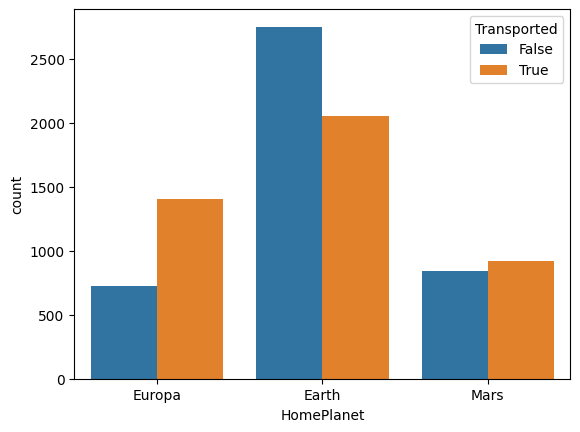

In [13]:
sns.countplot(data = df_train, x = 'HomePlanet', hue='Transported')

<Axes: xlabel='CryoSleep', ylabel='count'>

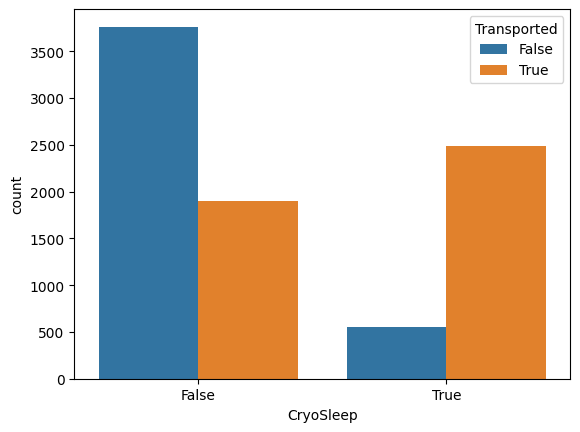

In [14]:
sns.countplot(data = df_train, x = 'CryoSleep', hue='Transported')

<Axes: xlabel='Age', ylabel='Count'>

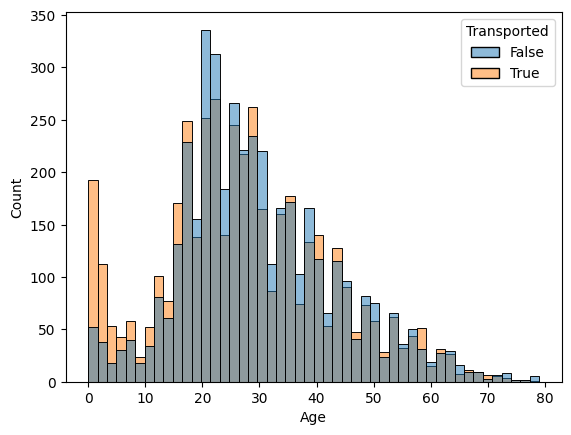

In [15]:
sns.histplot(data = df_train, x = 'Age', hue='Transported')

<Axes: xlabel='VIP', ylabel='count'>

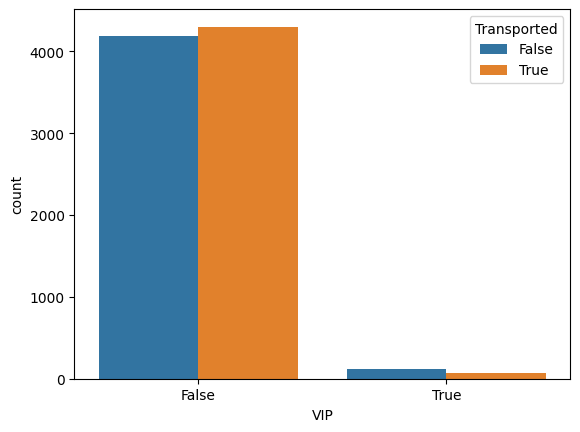

In [16]:
sns.countplot(data = df_train, x = 'VIP', hue = 'Transported')

<Axes: xlabel='Transported', ylabel='Age'>

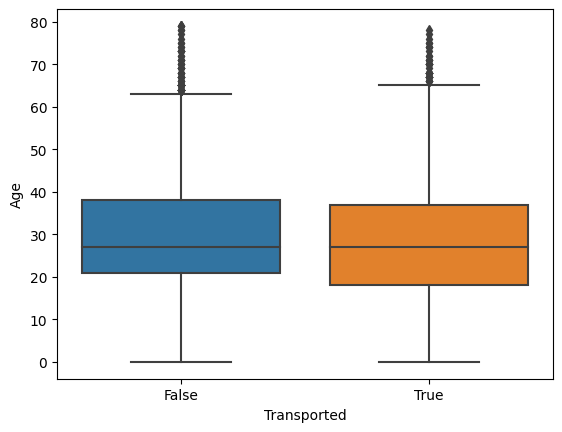

In [17]:
sns.boxplot(data = df_train, x = 'Transported' , y = 'Age')

In [18]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [20]:
df_train_dummies = pd.get_dummies(df_train['HomePlanet']).astype(int)
df_test_dummies = pd.get_dummies(df_test['HomePlanet']).astype(int)

In [21]:
df_train.drop('HomePlanet', axis = 1, inplace = True)
df_test.drop('HomePlanet', axis = 1, inplace = True)

In [22]:
df_train = pd.concat([df_train,df_train_dummies], axis = 1)
df_test = pd.concat([df_test,df_test_dummies], axis = 1)

In [23]:
df_train.head()


,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
PassengerId,,,,,,,,,,,,,,,
0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [24]:
df_train['VIP']=df_train['VIP'].replace({True:1,False:0})
df_test['VIP']=df_test['VIP'].replace({True:1,False:0})

df_train['CryoSleep']=df_train['CryoSleep'].replace({True:1,False:0})
df_test['CryoSleep']=df_test['CryoSleep'].replace({True:1,False:0})

In [25]:
df_train.head()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
PassengerId,,,,,,,,,,,,,,,
0001_01,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
0002_01,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
0003_01,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
0003_02,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
0004_01,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [26]:
df_train[['Deck', 'Cabin_Num','Side']] = df_train['Cabin'].apply(lambda x : pd.Series(x.split('/')))
df_test[['Deck', 'Cabin_Num','Side']] = df_test['Cabin'].apply(lambda x : pd.Series(x.split('/')))

In [27]:
df_train.drop('Cabin',axis =1, inplace = True)
df_test.drop('Cabin',axis =1, inplace = True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8693 non-null   int64  
 1   Destination   8693 non-null   object 
 2   Age           8693 non-null   float64
 3   VIP           8693 non-null   int64  
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Name          8493 non-null   object 
 10  Transported   8693 non-null   bool   
 11  Earth         8693 non-null   int64  
 12  Europa        8693 non-null   int64  
 13  Mars          8693 non-null   int64  
 14  Deck          8693 non-null   object 
 15  Cabin_Num     8693 non-null   object 
 16  Side          8693 non-null   object 
dtypes: bool(1), float64(6), int64(5), object(5)
memory usage: 1.4+ MB


In [29]:
dummies = pd.get_dummies(df_train['Deck']).astype(int)
dummies1 = pd.get_dummies(df_test['Deck']).astype(int)

In [30]:
df_train.drop('Deck',axis = 1, inplace = True)
df_test.drop('Deck',axis = 1, inplace = True)

In [31]:
df_train = pd.concat([df_train,dummies],axis = 1)
df_test = pd.concat([df_test,dummies1],axis = 1)

In [32]:
df_train['Cabin_Num'] = df_train['Cabin_Num'].astype(int)
df_test['Cabin_Num'] = df_test['Cabin_Num'].astype(int)

In [33]:
dummies = pd.get_dummies(df_train['Side'],drop_first=True).astype(int)
dummies1 = pd.get_dummies(df_test['Side'],drop_first=True).astype(int)

In [34]:
df_train.drop('Side',axis=1,inplace=True)
df_test.drop('Side',axis=1,inplace=True)

In [35]:
df_train = pd.concat([df_train,dummies],axis=1)
df_test = pd.concat([df_test,dummies1],axis=1)

In [36]:
dummies = pd.get_dummies(df_train['Destination']).astype(int)
dummies1 = pd.get_dummies(df_test['Destination']).astype(int)

In [37]:
df_train.drop('Destination',axis=1,inplace=True)
df_test.drop('Destination',axis=1,inplace=True)

In [38]:
df_train = pd.concat([df_train,dummies],axis=1)
df_test = pd.concat([df_test,dummies1],axis=1)

In [39]:
dummies = pd.get_dummies(df_train['Transported'], prefix ='Transported',drop_first =True).astype(int)

df_train.drop('Transported',axis=1,inplace=True)

df_train = pd.concat([df_train,dummies],axis=1)


In [40]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [41]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,Cabin_Num,A,B,C,D,E,F,G,T,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Transported_True
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1


In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df_train is a NumPy array, convert it to a DataFrame
df_train = pd.DataFrame(df_train)

# Continue with the code for scaling
scaler = MinMaxScaler()
columns_to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])




In [43]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,Cabin_Num,A,B,C,D,E,F,G,T,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Transported_True
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
0002_01,0,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
0003_01,0,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
0003_02,0,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
0004_01,0,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CryoSleep         8693 non-null   int64  
 1   Age               8693 non-null   float64
 2   VIP               8693 non-null   int64  
 3   RoomService       8693 non-null   float64
 4   FoodCourt         8693 non-null   float64
 5   ShoppingMall      8693 non-null   float64
 6   Spa               8693 non-null   float64
 7   VRDeck            8693 non-null   float64
 8   Earth             8693 non-null   int64  
 9   Europa            8693 non-null   int64  
 10  Mars              8693 non-null   int64  
 11  Cabin_Num         8693 non-null   int64  
 12  A                 8693 non-null   int64  
 13  B                 8693 non-null   int64  
 14  C                 8693 non-null   int64  
 15  D                 8693 non-null   int64  
 16  E                 8693 non-null   int6

In [45]:
df_train.isnull().sum()

CryoSleep           0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Earth               0
Europa              0
Mars                0
Cabin_Num           0
A                   0
B                   0
C                   0
D                   0
E                   0
F                   0
G                   0
T                   0
S                   0
55 Cancri e         0
PSO J318.5-22       0
TRAPPIST-1e         0
Transported_True    0
dtype: int64

In [46]:
X_train = df_train.drop('Transported_True',axis =1)
y_train = df_train['Transported_True']
X_test = df_test

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [48]:
#Logistic Regression
lr = LogisticRegression(penalty = 'l1', C = 100, solver= 'liblinear', max_iter=10000)
lr = lr.fit(X_train,y_train)

In [49]:
#Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 10, n_estimators=200)
rf = rf.fit(X_train, y_train)


In [50]:
#XGBoost
xgb = XGBClassifier(subsample= 0.9, sampling_method='uniform', reg_lambda= 1, reg_alpha= 0, n_estimators= 200, min_child_weight= 10, max_depth= 5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.5)
xgb = xgb.fit(X_train, y_train)

In [51]:
#Cat Boost
cb = CatBoostClassifier(subsample= 0.8, learning_rate= 0.1, l2_leaf_reg = 3, iterations= 50, depth = 6, border_count = 32)

cb = cb.fit(X_train, y_train)

0:	learn: 0.6527404	total: 58.3ms	remaining: 2.86s
1:	learn: 0.6136303	total: 62ms	remaining: 1.49s
2:	learn: 0.5853855	total: 65.4ms	remaining: 1.02s
3:	learn: 0.5573146	total: 68.4ms	remaining: 787ms
4:	learn: 0.5406554	total: 71.5ms	remaining: 643ms
5:	learn: 0.5251958	total: 74.8ms	remaining: 549ms
6:	learn: 0.5104689	total: 78.2ms	remaining: 480ms
7:	learn: 0.4951286	total: 81.3ms	remaining: 427ms
8:	learn: 0.4869681	total: 84.7ms	remaining: 386ms
9:	learn: 0.4774469	total: 87.9ms	remaining: 352ms
10:	learn: 0.4686700	total: 91.2ms	remaining: 323ms
11:	learn: 0.4619166	total: 94.8ms	remaining: 300ms
12:	learn: 0.4567304	total: 98.6ms	remaining: 281ms
13:	learn: 0.4524165	total: 102ms	remaining: 264ms
14:	learn: 0.4458084	total: 107ms	remaining: 249ms
15:	learn: 0.4414431	total: 111ms	remaining: 237ms
16:	learn: 0.4370196	total: 116ms	remaining: 224ms
17:	learn: 0.4330837	total: 119ms	remaining: 212ms
18:	learn: 0.4301463	total: 123ms	remaining: 200ms
19:	learn: 0.4271308	total: 12

In [52]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('rf',rf),('xgb',xgb),('cb',cb)], voting = 'soft', weights = [1, 1, 2, 3]) 

voting_clf.fit(X_train,y_train)
pred = voting_clf.predict(X_test).astype(int)

first_submission = {'PassengerId': df_test.index, 'Transported': pred}
first_submission = pd.DataFrame(data=first_submission)
first_submission['Transported'] = first_submission['Transported'].map({1: True, 0: False})
first_submission.to_csv('submission.csv', index=False)

0:	learn: 0.6527404	total: 5.35ms	remaining: 262ms
1:	learn: 0.6136303	total: 9.52ms	remaining: 228ms
2:	learn: 0.5853855	total: 13.4ms	remaining: 210ms
3:	learn: 0.5573146	total: 17.3ms	remaining: 199ms
4:	learn: 0.5406554	total: 21.2ms	remaining: 191ms
5:	learn: 0.5251958	total: 25.1ms	remaining: 184ms
6:	learn: 0.5104689	total: 29.1ms	remaining: 179ms
7:	learn: 0.4951286	total: 32.8ms	remaining: 172ms
8:	learn: 0.4869681	total: 36.6ms	remaining: 167ms
9:	learn: 0.4774469	total: 40.6ms	remaining: 162ms
10:	learn: 0.4686700	total: 44.3ms	remaining: 157ms
11:	learn: 0.4619166	total: 47.6ms	remaining: 151ms
12:	learn: 0.4567304	total: 50.5ms	remaining: 144ms
13:	learn: 0.4524165	total: 53.6ms	remaining: 138ms
14:	learn: 0.4458084	total: 56.9ms	remaining: 133ms
15:	learn: 0.4414431	total: 60ms	remaining: 128ms
16:	learn: 0.4370196	total: 63.6ms	remaining: 124ms
17:	learn: 0.4330837	total: 66.8ms	remaining: 119ms
18:	learn: 0.4301463	total: 69.9ms	remaining: 114ms
19:	learn: 0.4271308	tot